## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [3]:
data = np.load('average_ratings.npy')

In [5]:
print(len(data[0]))

1095


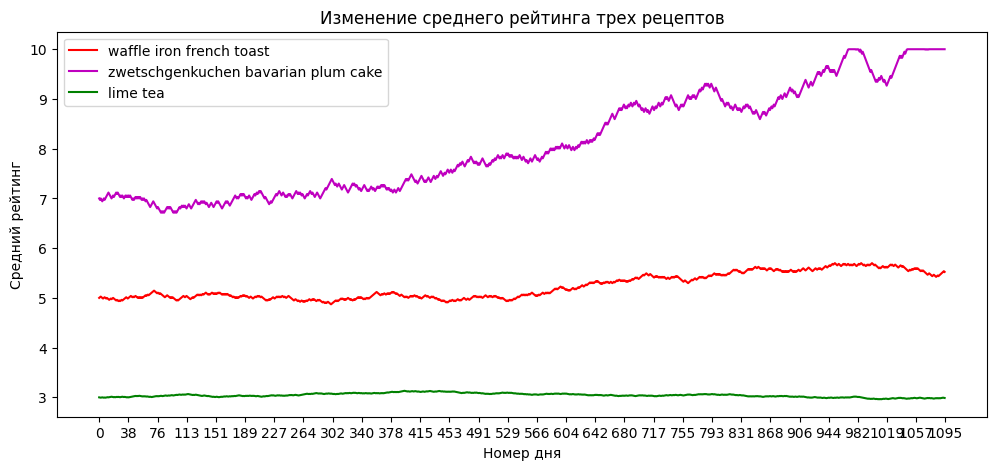

In [6]:
plt.figure(figsize=(12, 5)) # размер фигуры
plt.plot(list(range(len(data[0]))), data[0], 'r', label='waffle iron french toast')
plt.plot(list(range(len(data[1]))), data[1], 'm', label='zwetschgenkuchen bavarian plum cake')
plt.plot(list(range(len(data[2]))), data[2], 'g', label='lime tea') # r, m, g - цвета
plt.xticks(np.linspace(0,len(data[0]),30)) # изменение шага на оси x
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.legend(loc=2, prop={'size': 10}) # 2-расположение легенды в левом углу; prop-размер легенды 
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [5]:
date = pd.date_range(start = '1/1/2019',  end = '30/12/2021')

C:\Users\Саня\AppData\Local\Temp\ipykernel_18672\3863275250.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date = pd.date_range(start = '1/1/2019',  end = '30/12/2021')


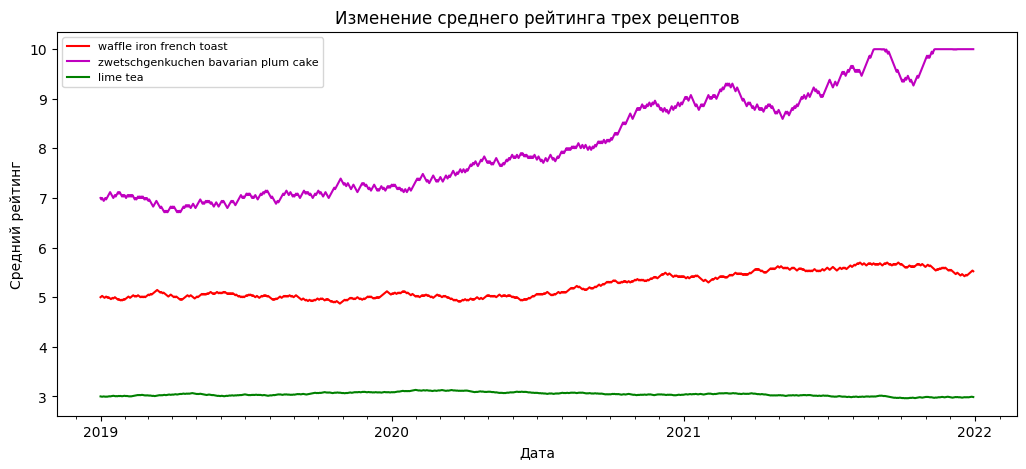

In [74]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.5, 0.8])
ax.plot(date, data[0], 'r', label='waffle iron french toast')
ax.plot(date, data[1], 'm', label='zwetschgenkuchen bavarian plum cake')
ax.plot(date, data[2], 'g', label='lime tea') # r, m, g - цвета

months = mdates.MonthLocator()

#ax.set_xticks(np.linspace(0,len(data[0]),37)) # изменение шага на оси x
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13))) # Новое видимое значение на каждой 13 метке от первого года
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # отображение засечек равных каждому месяцу
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator())) # Оставляем в дате только год


ax.legend(loc=2, prop={'size': 8}) 

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

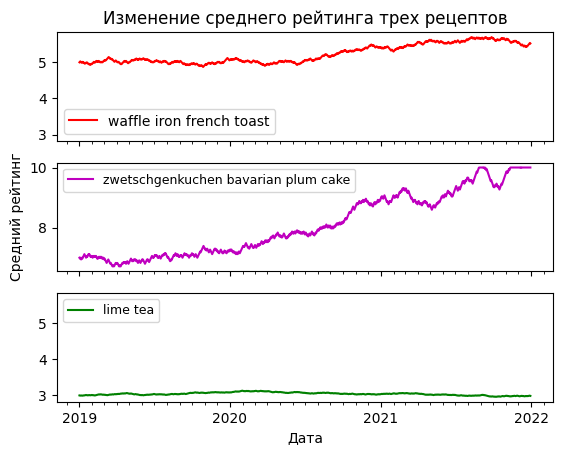

In [24]:
ax1 = plt.subplot(311) # Первое место в сетке из 3-х строк и 1-ого столбца 
plt.plot(date, data[0], 'r', label='waffle iron french toast')
plt.tick_params('x', labelbottom=False) # labelbottom параметр, который скрывает обозначение на оси
plt.legend()

ax2 = plt.subplot(312, sharex=ax1) # Второе место в сетке из 3-х строк и 1-ого столбца
plt.plot(date, data[1], 'm', label='zwetschgenkuchen bavarian plum cake')
plt.tick_params('x', labelbottom=False)
plt.legend(loc=2, prop={'size': 9})


ax3 = plt.subplot(313, sharex=ax1, sharey=ax1) # Третье место в сетке из 3-х строк и 1-ого столбца
plt.plot(date, data[2], 'g', label='lime tea')
plt.legend(loc=2, prop={'size': 9})

ax1.set_title('Изменение среднего рейтинга трех рецептов')
ax3.set_xlabel('Дата')
ax2.set_ylabel('Средний рейтинг')

ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13))) # Новое видимое значение на каждой 13 метке от первого года
ax3.xaxis.set_minor_locator(mdates.MonthLocator()) # отображение засечек равных каждому месяцу
ax3.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax3.xaxis.get_major_locator())) # Оставляем в дате только год

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [34]:
data2 = np.load('visitors.npy')
data2

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

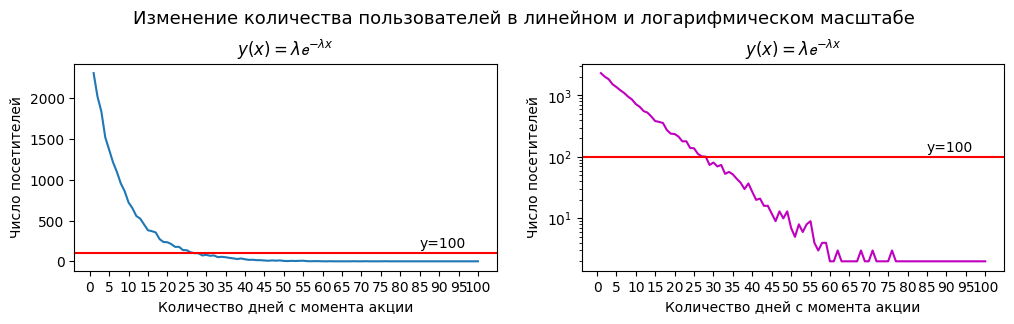

In [135]:
f = plt.figure(figsize=(12,3))
f.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=13)

ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(np.arange(1, 101), data2)
ax.set_xticks(np.linspace(0,100,21))
ax2.semilogy(np.arange(1, 101), data2, 'm') #функция откладывает логарифмический маштаб(по основанию 10) для оси оY
ax2.set_xticks(np.linspace(0,100,21))

ax.set_title(r'$y(x)=\lambda \mathcal{e}^{- \lambda x}$')
ax2.set_title(r'$y(x)=\lambda \mathcal{e}^{- \lambda x}$')

ax.axhline(y=100, color='r')
ax.text(85, 170, 'y=100')
ax2.axhline(y=100, color='r')
ax2.text(85, 120, 'y=100')

ax.set_xlabel('Количество дней с момента акции')
ax.set_ylabel('Число посетителей')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')
f.subplots_adjust(top=0.8) # смещение заголовка вверх

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [6]:
recipes = pd.read_csv(r'C:\Users\Саня\Downloads\lr2\recipes_sample.csv', delimiter=",", parse_dates=['submitted'])
reviews = pd.read_csv(r'C:\Users\Саня\Downloads\lr2\reviews_sample.csv', delimiter=",", index_col=0)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [13]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [3]:
short = recipes[recipes['minutes'] < 5]
print(short.shape[0])
print(short.mean(axis=0, numeric_only=True)['n_steps'])
middle = recipes[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
print('-----------------')
print(middle.shape[0])
print(middle.mean(axis=0, numeric_only=True)['n_steps'])
long = recipes[recipes['minutes'] >= 50]
print('-----------------')
print(long.shape[0])
print(long.mean(axis=0, numeric_only=True)['n_steps'])

675
4.990430622009569
-----------------
17607
8.581921927361652
-----------------
11718
11.917290164603456


Text(0.5, 1.0, 'Размеры групп рецептов')

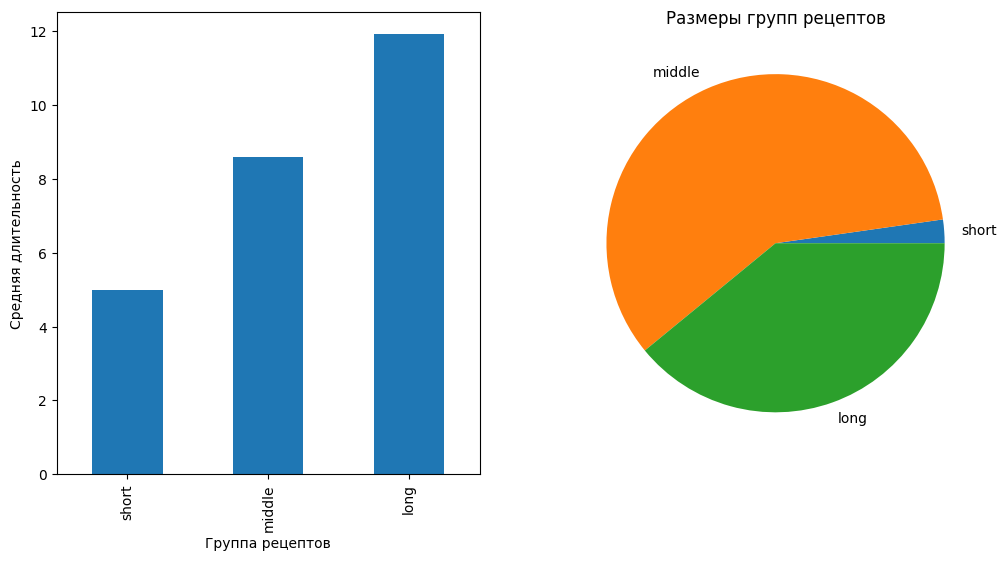

In [40]:
recipes_mean = pd.Series([short.mean(axis=0, numeric_only=True)['n_steps'], 
                          middle.mean(axis=0, numeric_only=True)['n_steps'], 
                          long.mean(axis=0, numeric_only=True)['n_steps']], index=['short', 'middle', 'long'])
count_recipes = pd.Series([short.shape[0], middle.shape[0], long.shape[0]], index=['short', 'middle', 'long'])

f = plt.figure(figsize=(12,3))
ax1 = f.add_subplot(121)
ax1 = recipes_mean.plot(kind='bar')
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax2 = f.add_subplot(122)
ax2 = count_recipes.plot(kind='pie', figsize=(12, 6))
ax2.set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0, 0.5, 'Кол-во поставленных оценок')

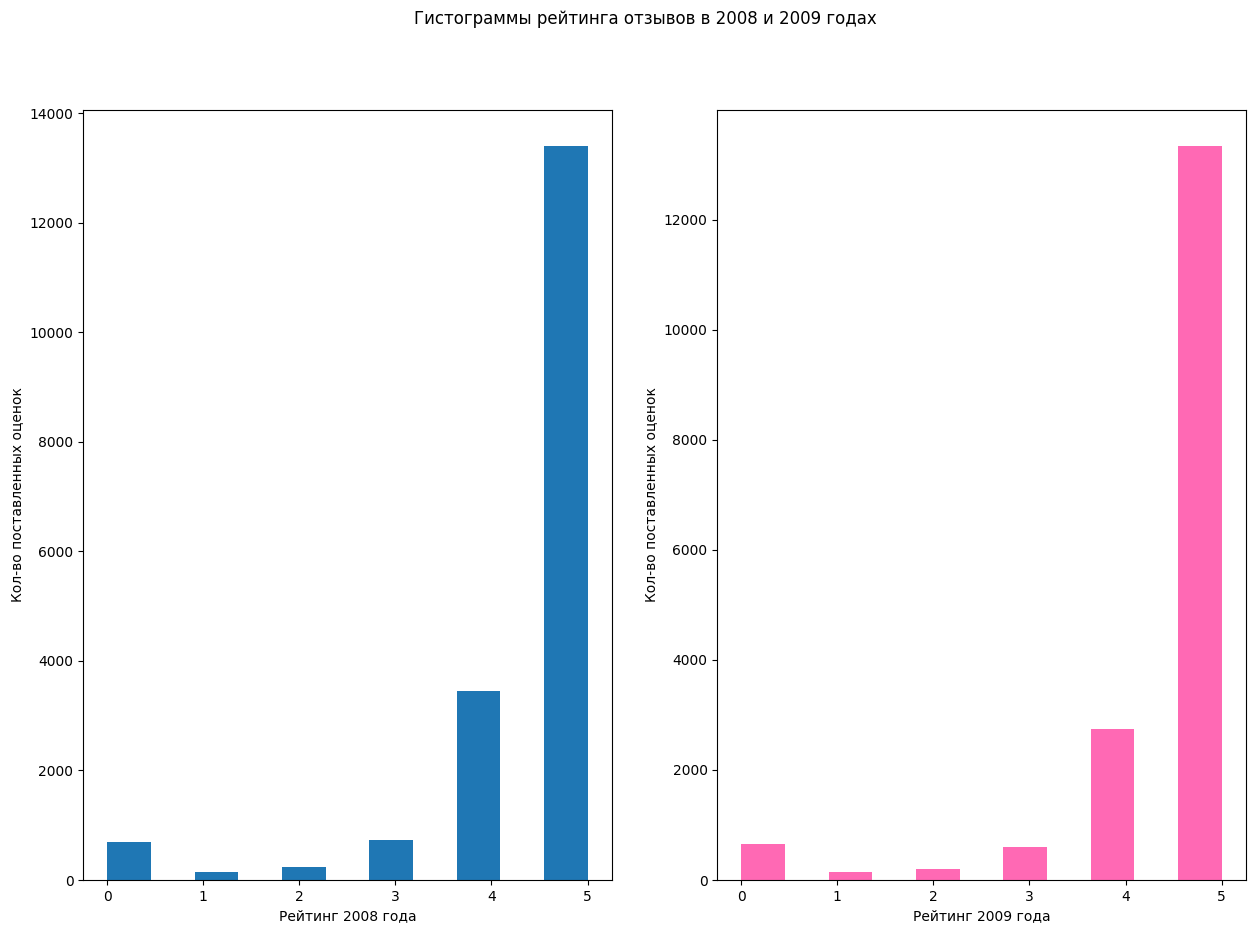

In [6]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
reviews_2008 = reviews[(reviews['date'] >= '2008') &(reviews['date'] <  '2009')]
reviews_2009 = reviews[(reviews['date'] >= '2009') &(reviews['date'] <  '2010')]
ax0 = fig.add_subplot(121)
reviews_2008['rating'].plot.hist(bins=11)
ax0.set_ylabel('Кол-во поставленных оценок')
ax0.set_xlabel('Рейтинг 2008 года')
ax1 = fig.add_subplot(122)
reviews_2009['rating'].plot.hist(bins=11, color='hotpink')
ax1.set_xlabel('Рейтинг 2009 года')
ax1.set_ylabel('Кол-во поставленных оценок')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type_of_recipe
91,tasty dish s banana pudding in 2 minutes,286484,2,47892,2008-02-13,NaN,"""mmmm, i love bananas!"" a --tasty dish-- origi...",4.0,short
93,1 minute cake,290187,2,584365,2008-03-05,20.0,it's not a fancy cake but when you eat it warm...,NaN,short
104,1 minute blueberries cream,428566,2,1375473,2010-06-04,4.0,i was craving blueberry tonight but wanted non...,NaN,short
105,1 minute breakfast sandwich,533190,3,33186,2017-08-14,10.0,there's no excuse to skip breakfast when it's ...,12.0,short
143,2 minute broccoli,256464,4,165433,2007-10-01,7.0,"so easy. tender crisp. hot, steamed broccoli...",2.0,short
...,...,...,...,...,...,...,...,...,...
29693,yogurt icing,19988,3,10404,2002-02-18,NaN,this is posted by request.,NaN,short
29712,you won t believe it s not butter,84239,3,67573,2004-02-17,NaN,this does taste like real butter. this is not ...,NaN,short
29720,yule mule cocktail,443502,4,135470,2010-12-03,NaN,"like a tom collins, only better. ho, ho, ho!",4.0,short
29754,yummy honey and pear sandwiches,171091,2,318506,2006-06-02,3.0,i went looking for sandwich fillings for my on...,4.0,short


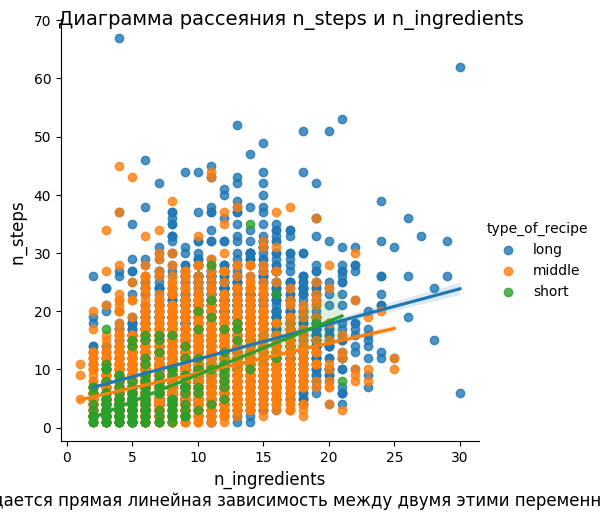

In [8]:
import seaborn as sns
# Добавление столбика с названием рецепта
recipes.loc[recipes["minutes"] < 5 ,"type_of_recipe"] = 'short'
recipes.loc[recipes["minutes"] >= 50, "type_of_recipe"] = "long"
recipes.loc[(recipes['minutes'] >=5) &(recipes['minutes'] < 50), 'type_of_recipe'] = 'middle'

t0=recipes[['n_steps', 'n_ingredients','type_of_recipe']]
#hue -  определяет кол-во цветов по данным из столбца ( 3 типа рецепта = 3 цвета)
#lmplot метод строит сам график и регрессионную модель
diagr=sns.lmplot( data=t0, hue='type_of_recipe', x='n_ingredients',y='n_steps')
# Название заголовка 
diagr.fig.suptitle("Диаграмма рассеяния n_steps и n_ingredients",fontsize=14)
# Название осей
diagr.set_axis_labels(y_var="n_steps ",x_var='n_ingredients\n Не наблюдается прямая линейная зависимость между двумя этими переменными',fontsize=12);

date+ recipes[recipes['type_of_recipe'] == 'short']

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [5]:
data = recipes[['n_steps', 'n_ingredients','id']].merge(reviews[['rating','recipe_id']], left_on='id', right_on='recipe_id')
data

,n_steps,n_ingredients,id,rating,recipe_id
0,NaN,18.0,44123,5,44123
1,NaN,18.0,44123,5,44123
2,NaN,18.0,44123,5,44123
3,NaN,NaN,67664,5,67664
4,NaN,NaN,67664,5,67664
...,...,...,...,...,...
126691,NaN,NaN,486161,5,486161
126692,NaN,NaN,486161,5,486161
126693,NaN,NaN,486161,5,486161
126694,NaN,NaN,486161,5,486161


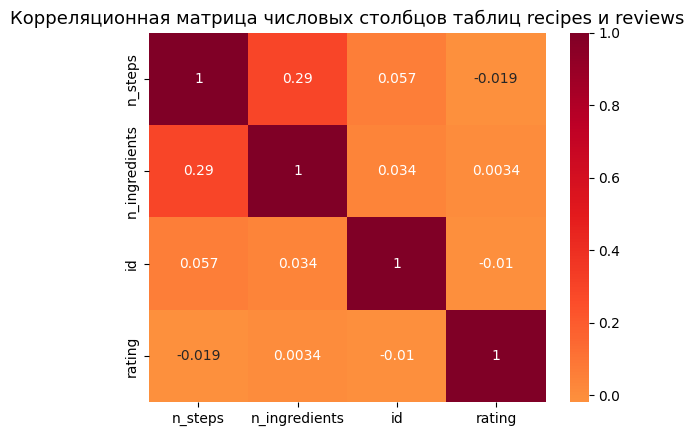

In [6]:
import seaborn as sns
# cmap - цветовая палитра
# center - значение, при котором центрируется цветовая карта при построении расходящихся данных.
# annot - вставляет значения в каждую ячейку матрицы
dataplot=sns.heatmap(data[['n_steps', 'n_ingredients','id', 'rating']].corr(), cmap='YlOrRd', center=0.0, annot=True).set_title("Корреляционная матрица числовых столбцов таблиц recipes и reviews", fontsize=13)